# #Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. Perform following tasks:
1.	Pre-process the dataset.
2.	Identify outliers.
3.	Check the correlation.
4.	Implement linear regression and random forest regression models.
5.	Evaluate the models and compare their respective scores like R2, RMSE, etc. Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset


In [49]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [50]:
!pip install haversine

import haversine as hs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
#importing the dataset
df = pd.read_csv('/content/uber.csv')

##  1.	Pre-process the dataset.

In [52]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [53]:
df.info() #To get the required information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98305 entries, 0 to 98304
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         98305 non-null  int64  
 1   key                98305 non-null  object 
 2   fare_amount        98304 non-null  float64
 3   pickup_datetime    98304 non-null  object 
 4   pickup_longitude   98304 non-null  float64
 5   pickup_latitude    98304 non-null  float64
 6   dropoff_longitude  98303 non-null  float64
 7   dropoff_latitude   98303 non-null  float64
 8   passenger_count    98304 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 6.8+ MB


In [54]:
df.columns #TO get number of columns in the dataset

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [55]:
df = df.drop(['Unnamed: 0', 'key'], axis= 1) #To drop unnamed column as it isn't required

In [56]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [57]:
df.shape #To get the total (Rows,Columns)

(98305, 7)

In [58]:
df.dtypes #To get the type of each column

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [59]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98305 entries, 0 to 98304
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        98304 non-null  float64
 1   pickup_datetime    98304 non-null  object 
 2   pickup_longitude   98304 non-null  float64
 3   pickup_latitude    98304 non-null  float64
 4   dropoff_longitude  98303 non-null  float64
 5   dropoff_latitude   98303 non-null  float64
 6   passenger_count    98304 non-null  float64
dtypes: float64(6), object(1)
memory usage: 5.3+ MB


In [60]:
df.describe() #To get statistics of each columns 

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,98304.000000,98304.000000,98304.000000,98303.000000,98303.000000,98304.000000
mean,11.383916,-72.526251,39.952988,-72.546192,39.921609,1.677205
std,9.906673,11.624568,9.103290,15.416406,7.316085,1.298595
min,-49.570000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992018,40.734835,-73.991412,40.733703,1.000000
50%,8.500000,-73.981802,40.752628,-73.980095,40.752948,1.000000
75%,12.500000,-73.967162,40.767149,-73.963802,40.768087,2.000000
max,350.000000,57.418457,1644.421482,1153.572603,872.697628,6.000000


### Filling Missing values

In [61]:
df.isnull().sum() 

fare_amount          1
pickup_datetime      1
pickup_longitude     1
pickup_latitude      1
dropoff_longitude    2
dropoff_latitude     2
passenger_count      1
dtype: int64

In [62]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace = True)

In [63]:
df.isnull().sum() 

fare_amount          1
pickup_datetime      1
pickup_longitude     1
pickup_latitude      1
dropoff_longitude    0
dropoff_latitude     0
passenger_count      1
dtype: int64

In [64]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

### Column pickup_datetime is in wrong format (Object). Convert it to DateTime Format

In [65]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce') 

In [66]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                  float64
dtype: object

### To segregate each time of date and time

In [67]:
df= df.assign(hour = df.pickup_datetime.dt.hour,
             day= df.pickup_datetime.dt.day,
             month = df.pickup_datetime.dt.month,
             year = df.pickup_datetime.dt.year,
             dayofweek = df.pickup_datetime.dt.dayofweek)

In [68]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,19.0,7.0,5.0,2015.0,3.0
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,20.0,17.0,7.0,2009.0,4.0
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,21.0,24.0,8.0,2009.0,0.0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,8.0,26.0,6.0,2009.0,4.0
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5.0,17.0,28.0,8.0,2014.0,3.0


In [69]:
# drop the column 'pickup_daetime' using drop()
# 'axis = 1' drops the specified column

df = df.drop('pickup_datetime',axis=1)


In [70]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19.0,7.0,5.0,2015.0,3.0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20.0,17.0,7.0,2009.0,4.0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21.0,24.0,8.0,2009.0,0.0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8.0,26.0,6.0,2009.0,4.0
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,17.0,28.0,8.0,2014.0,3.0


In [71]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
hour                 float64
day                  float64
month                float64
year                 float64
dayofweek            float64
dtype: object

## Checking outliers and filling them 

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

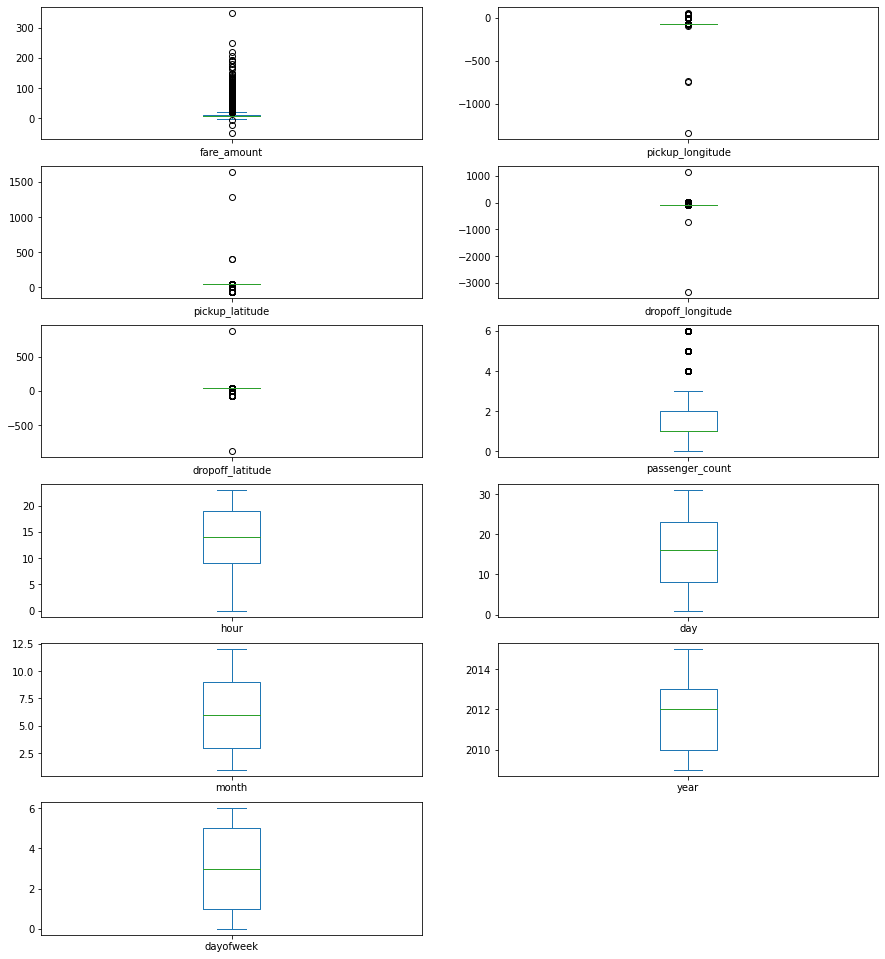

In [72]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot to check the outliers

In [73]:
#Using the InterQuartile Range to fill the values
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

In [74]:
df = treat_outliers_all(df , df.iloc[: , 0::])

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

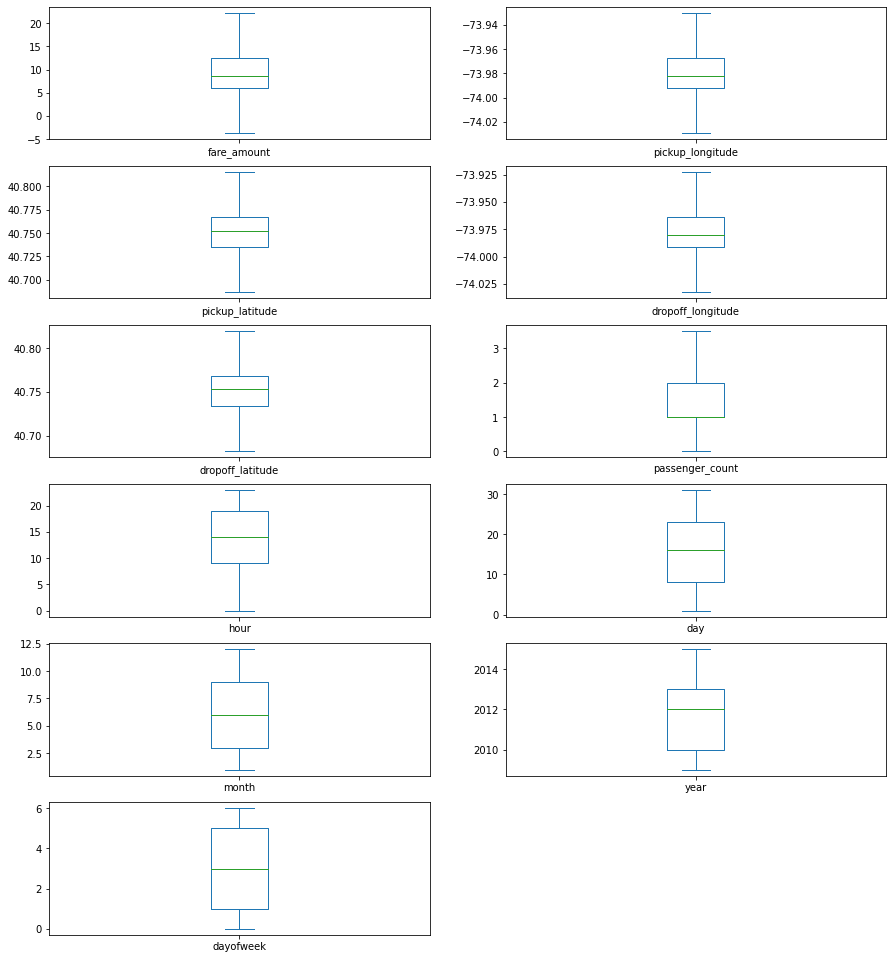

In [75]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot shows that dataset is free from outliers

In [76]:
#pip install haversine
import haversine as hs  #Calculate the distance using Haversine to calculate the distance between to points. Can't use Eucladian as it is for flat surface.
travel_dist = []
for pos in range(len(df['pickup_longitude'])):
        long1,lati1,long2,lati2 = [df['pickup_longitude'][pos],df['pickup_latitude'][pos],df['dropoff_longitude'][pos],df['dropoff_latitude'][pos]]
        loc1=(lati1,long1)
        loc2=(lati2,long2)
        c = hs.haversine(loc1,loc2)
        travel_dist.append(c)
    
print(travel_dist)
df['dist_travel_km'] = travel_dist
df.head()

[1.6833250775073447, 2.4575932783467835, 5.036384146783453, 1.661685753650294, 4.10936330833837, 0.0, 9.51952287574902, 0.788073297883273, 2.3327142314177545, 4.889423641655177, 2.2508607308770285, 0.788073297883273, 0.3022521108558365, 3.5812557740132496, 1.3099517093917648, 1.716279792276335, 0.7299665570466272, 2.515953547298386, 1.790321726187665, 1.0347050399795192, 2.4902472008677727, 0.9594701844599927, 1.2613897673437817, 1.7517650017211177, 6.1932445014761095, 2.736192584061414, 0.7232537124105735, 3.229443537425455, 1.4295172964395384, 2.233699311547041, 11.072951674851604, 1.8950491608266506, 1.9049353402365328, 3.1821178242889583, 4.451954448012045, 2.9230236888626995, 1.200213842045202, 2.635790807404098, 2.253613903554444, 9.167925226748514, 4.826533532872274, 1.2502926870845612, 0.7984742276755328, 0.840396152683202, 0.38519924001701444, 2.434346176233359, 3.127909533264099, 3.7346507724526368, 0.0, 4.504360509008704, 1.5579008497303448, 4.923160610490316, 7.683158068167

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19.0,7.0,5.0,2015.0,3.0,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20.0,17.0,7.0,2009.0,4.0,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21.0,24.0,8.0,2009.0,0.0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8.0,26.0,6.0,2009.0,4.0,1.661686
4,16.0,-73.929876,40.744085,-73.973082,40.761247,3.5,17.0,28.0,8.0,2014.0,3.0,4.109363


In [77]:
#Uber doesn't travel over 130 kms so minimize the distance 
df= df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)]
print("Remaining observastions in the dataset:", df.shape)

Remaining observastions in the dataset: (98304, 12)


In [78]:
#Finding inccorect latitude (Less than or greater than 90) and longitude (greater than or less than 180)
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
                                   (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
                                   (df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
                                   (df.dropoff_longitude > 90) |(df.dropoff_longitude < -90)
                                    ]

In [79]:
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [80]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19.0,7.0,5.0,2015.0,3.0,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20.0,17.0,7.0,2009.0,4.0,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21.0,24.0,8.0,2009.0,0.0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8.0,26.0,6.0,2009.0,4.0,1.661686
4,16.0,-73.929876,40.744085,-73.973082,40.761247,3.5,17.0,28.0,8.0,2014.0,3.0,4.109363


In [81]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
year                 0
dayofweek            0
dist_travel_km       0
dtype: int64

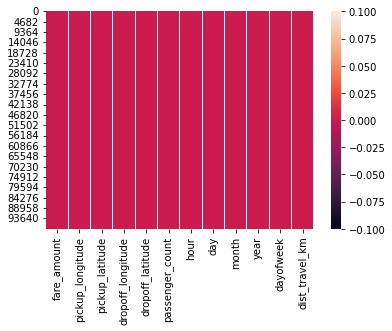

In [82]:
sns.heatmap(df.isnull()) #Free for null values

In [83]:
corr = df.corr() #Function to find the correlation

In [84]:
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.158408,-0.111797,0.216107,-0.131187,0.013649,-0.017306,0.008355,0.030321,0.140648,0.007725,0.786981
pickup_longitude,0.158408,1.000000,0.262313,0.426049,0.075572,-0.010849,0.010253,-0.004117,0.000794,0.010277,-0.028240,0.050358
pickup_latitude,-0.111797,0.262313,1.000000,0.050805,0.517927,-0.010245,0.028706,-0.003069,0.001718,-0.009711,-0.044165,-0.075318
dropoff_longitude,0.216107,0.426049,0.050805,1.000000,0.246638,-0.006885,-0.046789,-0.001522,0.002080,0.010949,-0.003216,0.149026
dropoff_latitude,-0.131187,0.075572,0.517927,0.246638,1.000000,-0.004518,0.022306,-0.004443,-0.001136,-0.004986,-0.033109,-0.055978
passenger_count,0.013649,-0.010849,-0.010245,-0.006885,-0.004518,1.000000,0.015372,0.003500,0.012931,-0.012235,0.050532,0.008297
hour,-0.017306,0.010253,0.028706,-0.046789,0.022306,0.015372,1.000000,0.005114,-0.006674,0.004009,-0.089898,-0.030341
day,0.008355,-0.004117,-0.003069,-0.001522,-0.004443,0.003500,0.005114,1.000000,-0.017020,-0.012847,0.004072,0.007437
month,0.030321,0.000794,0.001718,0.002080,-0.001136,0.012931,-0.006674,-0.017020,1.000000,-0.118441,-0.009352,0.010550
year,0.140648,0.010277,-0.009711,0.010949,-0.004986,-0.012235,0.004009,-0.012847,-0.118441,1.000000,0.004639,0.023213


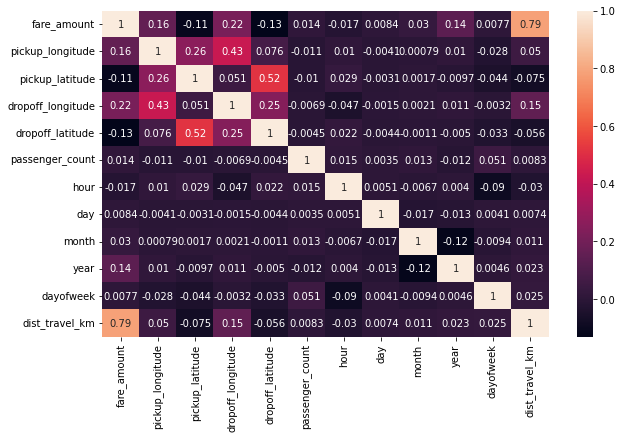

In [85]:
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(),annot = True) #Correlation Heatmap (Light values means highly correlated)

### Dividing the dataset into feature and target values 

In [86]:
x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]

In [87]:
y = df['fare_amount']

### Dividing the dataset into training and testing dataset

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)

### Linear Regression

In [89]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [90]:
regression.fit(X_train,y_train)

LinearRegression()

In [91]:
regression.intercept_ #To find the linear intercept

3804.796429643448

In [92]:
regression.coef_ #To find the linear coeeficient

array([ 2.60747745e+01, -7.36250659e+00,  2.06136204e+01, -1.89615123e+01,
        5.25587657e-02,  8.65156882e-03,  2.64529039e-03,  5.73708016e-02,
        3.61013315e-01, -4.16383868e-02,  1.84592262e+00])

In [93]:
prediction = regression.predict(X_test) #To predict the target values

In [94]:
print(prediction)

[9.56134116 9.73576771 6.83622364 ... 7.0543334  5.75214104 4.79523012]


In [95]:
y_test

30748     7.3
22997     9.5
96132     5.0
24946     6.1
41205     6.1
         ... 
15561     9.0
17529     4.5
42751    11.5
85550     5.3
12535     5.3
Name: fare_amount, Length: 32441, dtype: float64

### Metrics Evaluation using R2, Mean Squared Error, Root Mean Sqared Error

In [96]:
from sklearn.metrics import r2_score 

In [97]:
r2_score(y_test,prediction)

0.6698194252977905

In [98]:
from sklearn.metrics import mean_squared_error

In [99]:
MSE = mean_squared_error(y_test,prediction)

In [100]:
MSE 

9.673715224870481

In [101]:
RMSE = np.sqrt(MSE)

In [102]:
RMSE

3.11025967161433

### Random Forest Regression

In [103]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
rf = RandomForestRegressor(n_estimators=100) #Here n_estimators means number of trees you want to build before making the prediction

In [105]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [106]:
y_pred = rf.predict(X_test)

In [107]:
y_pred

array([8.649 , 8.555 , 6.6475, ..., 8.3925, 6.286 , 5.1785])

### Metrics evaluatin for Random Forest

In [108]:
R2_Random = r2_score(y_test,y_pred)

In [109]:
R2_Random

0.7915030220568924

In [110]:
MSE_Random = mean_squared_error(y_test,y_pred)

In [111]:
MSE_Random

6.108597974568333

In [112]:
RMSE_Random = np.sqrt(MSE_Random)

In [113]:
RMSE_Random

2.4715578032019265